# This Project Aims to Determine Whether a Relationship Between Malaria and Percipitation Rates Exists

* The data of 9 Sub-Saharan African countries are used
* 3 of these countries have high percipitation, 3 have medium, and 3 have low
* Sierra Leone, Liberia, Equatorial Guinea, Ghana, Tanzania, Mozambique, Botswana, South Africa, Namibia

<b>Step 1. Determine the correlation between all percipitation rates and malaria rates <br>
Step 2. Maybe determine correlation within each country <br>
Step 3. Create machine learning model to predict malaria rates from percipitation (regression) <br>
Step 4. Predict malaria rates for different countries <br>
Step 5. Find mean among high, medium, and low countries <br>
Step 6. Determine if there is a statistically significant difference between them <br>
Step 7. Maybe do SRI model afterwards </b>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Step 1

### Per Rate is annual percipitation rate in mm, Mal Rate is annual malaria rate per 1,000 people at risk

In [106]:
# Step 1 Determining correlation between all countries

total_df = pd.read_excel("Data/Total Data.xlsx")
total_df.describe()

,Per Rate,Mal Rate
count,189.000000,189.000000
mean,1324.815873,228.255197
std,916.780607,173.617809
min,231.800000,0.168270
25%,433.480000,7.456530
50%,1038.850000,310.783273
75%,2416.680000,375.631969
max,3534.950000,501.871376


#### Approximately 78% positive correlation between percipitation rates and malaria rates

In [107]:
# Finding correlation between percipitaiton rate and malaria rate

total_corr = total_df["Per Rate"].corr(total_df["Mal Rate"])
total_corr

0.7799014829025152

#### Many bunches of data (this was because I chose data in specific percipitaiton categories). Visually, malaria rates tend to increase with more percipitation

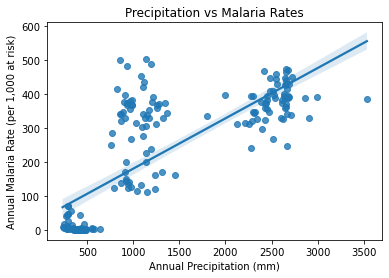

In [181]:
# Graphing scatterplot
sns.regplot(x=total_df["Per Rate"],y=total_df["Mal Rate"]).set(title="Precipitation vs Malaria Rates", 
                                                               xlabel="Annual Precipitation (mm)", 
                                                               ylabel="Annual Malaria Rate (per 1,000 at risk)");

# Step 3
Creating machine learning model

In [109]:
models = {"Random Forest Regressor": RandomForestRegressor(), "Linear Regression": LinearRegression(), 
          "SGD": SGDRegressor(), "Lasso": Lasso(), "ElasticNet": ElasticNet()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [110]:
# Defining X and y data
# Model will use percipitaiton rates to attempt to predict malaria rates
X = total_df.drop("Mal Rate", axis=1)
y = total_df["Mal Rate"]
X.head(), y.head()

(   Per Rate
 0   2675.52
 1   2661.41
 2   2660.00
 3   2544.16
 4   2685.00,
 0    469.996968
 1    473.005335
 2    465.025364
 3    444.057324
 4    428.588175
 Name: Mal Rate, dtype: float64)

In [111]:
# Splitting data into train and test sets (this also shuffles the data)
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [112]:
# First attempt, without standardizing data
fit_and_score(models, X_train, X_test, y_train, y_test)

{'Random Forest Regressor': 0.8026666601822584,
 'Linear Regression': 0.5744866072060061,
 'SGD': -3.611252742580351e+26,
 'Lasso': 0.5744865779767403,
 'ElasticNet': 0.5744865904432731}

## Random Forest Regressor has the best accuracy ~80%

In [113]:
# Now let's standardize the data, which could make predictions more accurate
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

X_train_z = X_train
X_test_z = X_test


z_scaler = StandardScaler().fit(X_train_z)

z_scaled_X_train = z_scaler.transform(X_train_z)
z_scaled_X_test = z_scaler.transform(X_test_z)

In [114]:
# Overall, standardizing data doesn't really improve anything
fit_and_score(models, z_scaled_X_train, z_scaled_X_test, y_train, y_test)

{'Random Forest Regressor': 0.8026666601822584,
 'Linear Regression': 0.5744866072060062,
 'SGD': 0.5744598517655621,
 'Lasso': 0.5744284347454304,
 'ElasticNet': 0.5085058650042368}

# Step 4 Predicting Malaria Rates
Now, we must use the create Random Forest Regressor model to actually predict malaria values in 2022. This will be based off of the mean percipitation present in 2021 (since 2022 is still ongoing as I am writing this).

First, the malaria rate for each country will be predicted <br>
Second, countries will be grouped by their percipitation levels and the mean values between them found <br>
Third, significance tests will be performed to determine if a difference exists

In [158]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [159]:
# Predicted malaria rates for HIGH Percipitation Countries
# These are Sierra Leone, Liberia, and Equatorial Guinea
# Values for 2021 percipitation are from World Bank
np.random.seed(42)

high_per_rates_2022 = {"Sierra Leone": 2787.93, "Libera": 2422.51, "Equatorial Guinea": 2466.59}
high_mal_rates_preds = {"Sierra Leone": 0, "Libera": 0, "Equatorial Guinea": 0}

for i in high_per_rates_2022:
    high_mal_rates_preds[i] = model.predict([[high_per_rates_2022[i]]])

high_mal_rates_preds

C:\Users\Daniyal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Daniyal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Daniyal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


{'Sierra Leone': array([419.26537469]),
 'Libera': array([365.36228696]),
 'Equatorial Guinea': array([403.89533196])}

In [160]:
# Cleaning up data so it looks nicer
for i in high_mal_rates_preds.items():
    high_mal_rates_preds[i[0]] = float(i[1])

print(high_mal_rates_preds)


{'Sierra Leone': 419.26537468500084, 'Libera': 365.36228696022954, 'Equatorial Guinea': 403.8953319634332}


In [161]:
# Predicted malaria rates for MEDIUM Percipitaiton Countries
# Ghana, Tanzania, Mozambique
np.random.seed(42)
med_per_rates_2022 = {"Ghana": 1262.45, "Tanzania": 958.86, "Mozambique": 842.94}
med_mal_rates_preds = {"Ghana": 0, "Tanzania": 0, "Mozambique": 0}

for i in med_per_rates_2022:
    med_mal_rates_preds[i] = model.predict([[med_per_rates_2022[i]]])

for i in med_mal_rates_preds.items():
    med_mal_rates_preds[i[0]] = float(i[1])

print(med_mal_rates_preds)

{'Ghana': 364.1689278343173, 'Tanzania': 210.8259680889383, 'Mozambique': 389.9286587591805}


C:\Users\Daniyal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Daniyal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Daniyal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [162]:
# Predicted malaria rates for LOW Percipitaiton Countries
# Botswana, South Africa, Namibia
np.random.seed(42)
low_per_rates_2022 = {"Botswana": 404.58, "South Africa": 526.6, "Namibia": 278.98}
low_mal_rates_preds = {"Botswana": 0, "South Africa": 0, "Namibia": 0}

for i in low_per_rates_2022:
    low_mal_rates_preds[i] = model.predict([[low_per_rates_2022[i]]])

for i in low_mal_rates_preds.items():
    low_mal_rates_preds[i[0]] = float(i[1])

print(low_mal_rates_preds)

{'Botswana': 1.5973375922810178, 'South Africa': 4.043997624206023, 'Namibia': 5.561769647535675}


C:\Users\Daniyal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Daniyal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Daniyal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [163]:
all_preds = {**high_mal_rates_preds, **med_mal_rates_preds, **low_mal_rates_preds}
all_preds

{'Sierra Leone': 419.26537468500084,
 'Libera': 365.36228696022954,
 'Equatorial Guinea': 403.8953319634332,
 'Ghana': 364.1689278343173,
 'Tanzania': 210.8259680889383,
 'Mozambique': 389.9286587591805,
 'Botswana': 1.5973375922810178,
 'South Africa': 4.043997624206023,
 'Namibia': 5.561769647535675}

In [164]:
# Step 5 Find Means Between Categories
np.random.seed(42)

from statistics import fmean
high_preds_mean = fmean(high_mal_rates_preds.values())
med_preds_mean = fmean(med_mal_rates_preds.values())
low_preds_mean = fmean(low_mal_rates_preds.values())

high_preds_mean, med_preds_mean, low_preds_mean

(396.1743312028878, 321.6411848941454, 3.734368288007572)

In [165]:
pd.Series(high_mal_rates_preds).describe(), pd.Series(med_mal_rates_preds).describe(), pd.Series(low_mal_rates_preds).describe()

(count      3.000000
 mean     396.174331
 std       27.768617
 min      365.362287
 25%      384.628809
 50%      403.895332
 75%      411.580353
 max      419.265375
 dtype: float64,
 count      3.000000
 mean     321.641185
 std       96.829232
 min      210.825968
 25%      287.497448
 50%      364.168928
 75%      377.048793
 max      389.928659
 dtype: float64,
 count    3.000000
 mean     3.734368
 std      2.000271
 min      1.597338
 25%      2.820668
 50%      4.043998
 75%      4.802884
 max      5.561770
 dtype: float64)

# Step 6 Significance Tests
Using 2 sample t tests for mean to determine significance
May be error prone because I did not take enough samples (maybe try 30 different seeds and take the mean of them)

* Let x̄h = Mean of high group.
* x̄m = Mean of medium group.
* x̄l = Mean of low group.
* sh = Standard error of high group.
* sm = Standard error of medium group.
* sl = Standard error of low group.

## 2 Sample t Test for High and Medium

**Ho: x̄h = x̄m, Ha: x̄h > x̄m** <br>
**df = 2**

$ t = \dfrac{x̄h-x̄m}{\sqrt{\dfrac{sh^2}{nh}+\dfrac{sm^2}{nm}}} $

$ t \approx \dfrac{396.174331-321.641185}{\sqrt{\dfrac{27.768617^2}{3}+\dfrac{96.829232^2}{3}}} $

$ t \approx 1.280, p \approx .164 $

There is not significant evidence to showcase that the high percipitation group's malaria rates are higher than the medium's

## 2 Sample t Test for High and Low

**Ho: x̄h = x̄l, Ha: x̄h > x̄l** <br>
**df = 2**

$ t = \dfrac{x̄h-x̄l}{\sqrt{\dfrac{sh^2}{nh}+\dfrac{sl^2}{nl}}} $

$ t \approx \dfrac{396.174331-3.734368}{\sqrt{\dfrac{27.768617^2}{3}+\dfrac{2.000271^2}{3}}} $

$ t \approx 24.415, p \approx .0008 $

There is significant evidence to showcase that the high percipitation groups's malaria rates are higher than the low's

## 2 Sample t Test for Medium and Low

**Ho: x̄m = x̄l, Ha: x̄m > x̄l** <br>
**df = 2**

$ t = \dfrac{x̄m-x̄l}{\sqrt{\dfrac{sm^2}{nm}+\dfrac{sl^2}{nl}}} $

$ t \approx \dfrac{321.641185-3.734368}{\sqrt{\dfrac{96.829232^2}{3}+\dfrac{2.000271^2}{3}}} $

$ t \approx 5.685, p \approx .0148 $

There is significant evidence to showcase that the medium percipitation group's malaria rates are higher than the low's

# Conclusion
Based off of the data, it seems that there is a significant difference in malaria rates between high and low percipitation countries and medium and low percipitation groups. As percipitation rates increase, so do malaria rates